In [77]:
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.optimize import curve_fit 
import numpy as np

In [78]:
# Whole plane body size 0 < x < a and 0 < y < b
a = 1
b = 1

# Grid will be (Nx-1) * (Ny-1) elements
Nx = 4
Ny = 4
number_of_elements = (Nx-1)*(Ny-1)

x_grid = np.outer(np.linspace(0, a, Nx), np.ones(Nx))
y_grid = np.outer(np.linspace(0, b, Ny), np.ones(Ny)).T

# Physical parameters
kx, ky, c, rho = 1, 1, 1, 1

# Parameters of "bell" temperatute distribution T(x,y) at the initial moment t=0
mu_x = 0.5
mu_y = 0.5
sigma_x = np.sqrt(0.5)
sigma_y = np.sqrt(0.5)

In [79]:
def U0(x,y,mu_x,mu_y,sigma_x,sigma_y):
    # "Bell" temperatute distribution t-1-1(x,y) at the initial moment t=0
    return np.exp(-(((x-mu_x)/sigma_x)**2 + ((y-mu_y)/sigma_y)**2)/2)

In [80]:
def temperature_polynomial(xy, a00, a10, a01, a20, a02): 
    x,y = xy
    
    # Define mathematical function for curve fitting 
    return a00 + a10*x + a01*y + a20*x**2 + a02*y**2 

In [81]:
def temperature_polynomial_decomposition(points_per_element):
    fig = plt.figure(figsize=(12,8))

    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    plt.title("Analytical temperature distribution")

    for j in range(Ny-1):
        for i in range(Nx-1):
            x = np.outer(
                np.linspace(x_grid[i][j], x_grid[i+1][j], points_per_element), np.ones(points_per_element)
            )
            y = np.outer(
                np.linspace(y_grid[i][j], y_grid[i][j+1], points_per_element), np.ones(points_per_element)
            ).T
            z = U0(x,y,mu_x,mu_y,sigma_x,sigma_y)
            ax1.plot_surface(
                X = x, 
                Y = y, 
                Z = z,
                cmap=cm.coolwarm
            )
            ax1.set_ylabel("Y-axis")
            ax1.set_xlabel("X-axis")
            ax1.set_zlabel(r"$U_0(x,y)$")

    ax2 = fig.add_subplot(1, 2, 2, projection="3d")
    plt.title("Temperature polynomial decomposition")

    coeffs = np.zeros((number_of_elements,3,3))

    element = 0
    for j in range(Ny-1):
        for i in range(Nx-1):
            x = np.outer(
                np.linspace(x_grid[i][j], x_grid[i+1][j], points_per_element), 
                np.ones(points_per_element)
            ).flatten()
            y = np.outer(
                np.linspace(y_grid[i][j], y_grid[i][j+1], points_per_element),
                np.ones(points_per_element)
            ).T.flatten()
            z = U0(x,y,mu_x,mu_y,sigma_x,sigma_y).flatten()

            # coordinated (x,y) and z ahould be float arrays
            popt, pcov = curve_fit(temperature_polynomial, (x,y), z)
            perr = np.sqrt(np.diag(pcov)) # std, uncertainty level for each estimated hyperparameter

            coeffs[element][0][0] = popt[0]
            coeffs[element][1][0] = popt[1]
            coeffs[element][0][1] = popt[2]
            coeffs[element][2][0] = popt[3]        
            coeffs[element][0][2] = popt[4]

            central_element_index = (Ny-1)//2*(Nx-1) + (Nx-1)//2
            if element == central_element_index:
                x,y = a/2,b/2
                print(
                    "Temperature in the central element according to analytical distribution:\n",
                    "U(a/2,b/2) =", U0(x,y,mu_x,mu_y,sigma_x,sigma_y)
                )
                print(
                    "Temperature in the central element according to the polinomial decomposition:\n",
                    "U(a/2,b/2) =", popt[0] + popt[1]*x + popt[2]*y + popt[3]*x**2 + popt[4]*y**2
                )
                print("Uncertainty level for each estimated hyperparameter:", perr)

            element += 1

            x = np.outer(
                np.linspace(x_grid[i][j], x_grid[i+1][j], points_per_element), 
                np.ones(points_per_element)
            )
            y = np.outer(
                np.linspace(y_grid[i][j], y_grid[i][j+1], points_per_element),
                np.ones(points_per_element)
            ).T
            ax2.plot_surface(
                X = x, 
                Y = y, 
                Z = popt[0] + popt[1]*x + popt[2]*y + popt[3]*x**2 + popt[4]*y**2,
                cmap=cm.coolwarm
            )
            ax2.set_ylabel("Y-axis")
            ax2.set_xlabel("X-axis")
            ax2.set_zlabel(r"$U_0(x,y)$")
    
    return plt.show()

Temperature in the central element according to analytical distribution:
 U(a/2,b/2) = 1.0
Temperature in the central element according to the polinomial decomposition:
 U(a/2,b/2) = 0.9997857251237849
Uncertainty level for each estimated hyperparameter: [0.00038973 0.00113746 0.00113746 0.0011325  0.0011325 ]


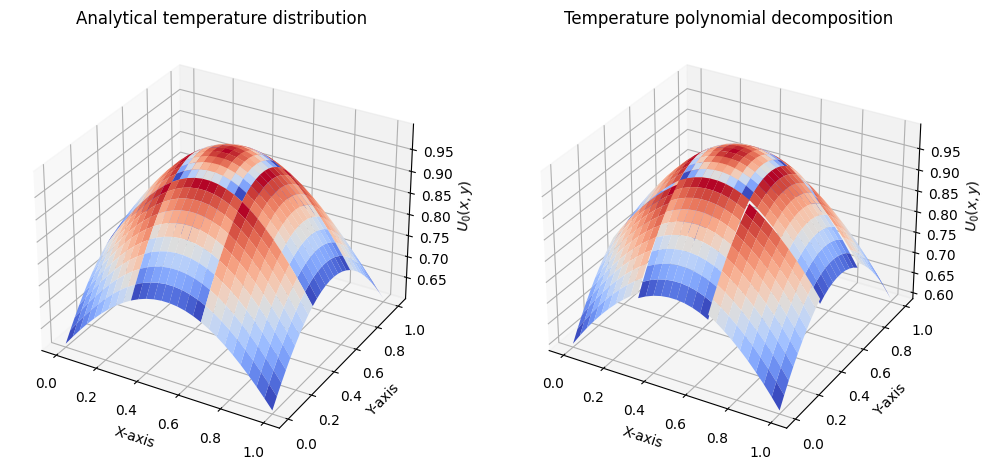

In [82]:
points_per_element = 10
temperature_polynomial_decomposition(points_per_element)